In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df=pd.read_csv("Inc_Exp_Data.csv")
df

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,5000,8000,3,2000,64200
1,6000,7000,2,3000,79920
2,10000,4500,2,0,112800
3,10000,2000,1,0,97200
4,12500,12000,2,3000,147000
5,14000,8000,2,0,196560
6,15000,16000,3,35000,167400
7,18000,20000,5,8000,216000
8,19000,9000,2,0,218880
9,20000,9000,4,0,220800


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Mthly_HH_Income    50 non-null     int64
 1   Mthly_HH_Expense   50 non-null     int64
 2   No_of_Fly_Members  50 non-null     int64
 3   Emi_or_Rent_Amt    50 non-null     int64
 4   Annual_HH_Income   50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


In [13]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06


<Axes: >

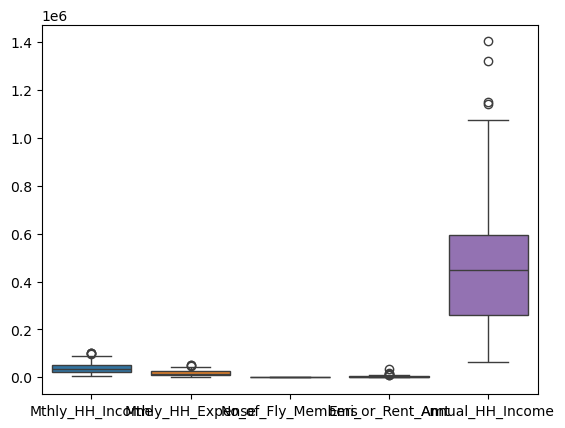

In [14]:
sns.boxplot(df)

In [15]:
np.mean(df)

110691.82

In [16]:
q1=np.percentile(df,25)
q3=np.percentile(df,75)
iqr=q3-q1
print("q1 :",q1)
print("q3 :",q3)
print("IQR :",iqr)

q1 : 4.25
q3 : 50375.0
IQR : 50370.75


In [17]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)

-75551.875
125931.125


In [18]:
def remove_outliers_iqr(df):
    cleaned_df = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df1 = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return df1

In [32]:
df1 = remove_outliers_iqr(df)

<Axes: >

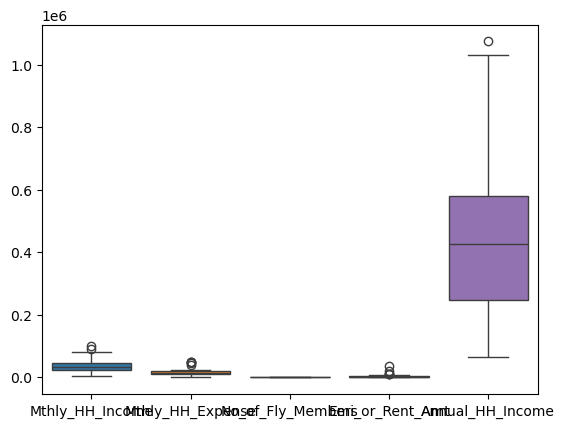

In [20]:
sns.boxplot(df1)

In [21]:
data=pd.DataFrame(df1)
data

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,5000,8000,3,2000,64200
1,6000,7000,2,3000,79920
2,10000,4500,2,0,112800
3,10000,2000,1,0,97200
4,12500,12000,2,3000,147000
5,14000,8000,2,0,196560
6,15000,16000,3,35000,167400
7,18000,20000,5,8000,216000
8,19000,9000,2,0,218880
9,20000,9000,4,0,220800


In [22]:
x=data.iloc[:,:4]
x

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt
0,5000,8000,3,2000
1,6000,7000,2,3000
2,10000,4500,2,0
3,10000,2000,1,0
4,12500,12000,2,3000
5,14000,8000,2,0
6,15000,16000,3,35000
7,18000,20000,5,8000
8,19000,9000,2,0
9,20000,9000,4,0


In [23]:
y=data.iloc[:,4:5]
y

,Annual_HH_Income
0,64200
1,79920
2,112800
3,97200
4,147000
5,196560
6,167400
7,216000
8,218880
9,220800


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(14, 4)
(14, 1)
(32, 4)
(32, 1)


In [26]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [27]:
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
print("Intercept :",reg.intercept_)
print("Coeff :",reg.coef_)

Intercept : [56084.51510715]
Coeff : [[ 1.12612456e+01 -1.42438521e+00 -5.66737566e+03 -9.60848332e-01]]


In [29]:
ypred=reg.predict(x_test)
ypred

array([[391948.97752814],
       [377899.29189332],
       [485021.54872633],
       [165540.16601668],
       [225314.2036245 ],
       [468497.93467935],
       [500555.9499453 ],
       [222687.8536496 ],
       [330801.75508532],
       [536301.11452836],
       [493226.68202471],
       [565821.25361928],
       [820217.48762894],
       [150952.48614864]])

In [30]:
from sklearn import metrics

In [31]:
print("MAE :",metrics.mean_absolute_error(y_test,ypred))
print("MSE :",metrics.mean_squared_error(y_test,ypred))
print("Rmse :",np.sqrt(metrics.mean_squared_error(y_test,ypred)))
print("R Squared:",metrics.r2_score(y_test,ypred))

MAE : 48745.31338095788
MSE : 3251824652.95255
Rmse : 57024.772274447096
R Squared: 0.894341331694882
